In [2]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/06_sphere_brush/py_files')

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

from math import pi
from create_in import create_in
from free_energy import free_energy

In [3]:
r_sphere = 10
N = 150
chi_surf = 0
chi = 0.5
alpha = 0.5
Cs_values = np.linspace(0.0001, 0.0007, num = 4)
S = 5
N_layers = N

In [4]:
file_name_pro_list = []

for Cs in Cs_values:
    file_name_pro = create_in(
        template_shpere = '/home/tpopova/prj/PB_SCF/06_sphere_brush/scf_templates/sphere.in',
        
        #название параметра
        range_param = 'cs',
        min_val = 0.1,
        max_val = 0.1,
        
        r_sphere = r_sphere,
        Cs = Cs,
        chi = chi,
        chi_surf = chi_surf,
        
        N_layers = N_layers,
        N = N,
        
        S = S,
        alpha = alpha)
    
    file_name_pro_list.append(file_name_pro)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 3.453493e+00 |g| = 1.285443e+01 alpha = 1.000000e+00 
hessian scaling: 0.572948
it =  1  E = 3.202151e+00 |g| = 1.215660e+01 alpha = 1.077794e-01 
it =  2  E = 6.147741e+00 |g| = 1.277214e+01 alpha = 2.889205e-02 
it =  3  E = 2.378662e+01 |g| = 1.239105e+01 alpha = 1.735550e-03 
it =  4  E = 2.608038e+01 |g| = 1.241806e+01 alpha = 1.346705e-03 
it =  5  E = 1.165362e+01 |g| = 1.238151e+01 alpha = 6.301428e-03 
it =  6  E = 2.447656e+01 |g| = 1.226085e+01 alpha = 1.328210e-03 
it =  7  E = 1.033783e+01 |g| = 1.227693e+01 alpha = 7.030682e-03 
it =  8  E = 1.954838e+01 |g| = 1.216399e+01 alpha = 1.839938e-03 
it =  9  E = 1.024634e+01 |g| = 1.215234e+01 alpha = 6.342198e-03 
it =  10  E = 1.450461e+01 |g| = 1.206646e+0

In [5]:
f_ion_SCF_quen_values, potential = [], []

for file_name_pro in file_name_pro_list:
    
    psi, phi_brush,r_range,  phi_end, f_ion_SCF_quen, Q_SCF_quen, pH_iep_in_quen, d_pH_b = free_energy(
        PK_MINUS=5.0,
        PK_PLUS=4.0,
        f_plus=0.5,
        pH_B=4.9,
        file_names=file_name_pro
    )
    f_ion_SCF_quen_values.append(f_ion_SCF_quen)
    potential.append(psi)

<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:22: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:22: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_2294771/3007414820.py:11: SyntaxWarning: invalid escape sequence '\D'
  axs[0].set_ylabel('$\Delta F_{{ion}}(z)$', fontsize=16)
/tmp/ipykernel_2294771/3007414820.py:22: SyntaxWarning: invalid escape sequence '\p'
  axs[1].set_ylabel('$\psi(z)$', fontsize=16)
/tmp/ipykernel_2294771/3007414820.py:23: SyntaxWarning: invalid escape sequence '\D'
  axs[1].legend(title=f'$\Delta pH_B = {round(d_pH_b, 1)}, pH_{{IEP}} = {round(pH_iep_in_quen, 1)}$',


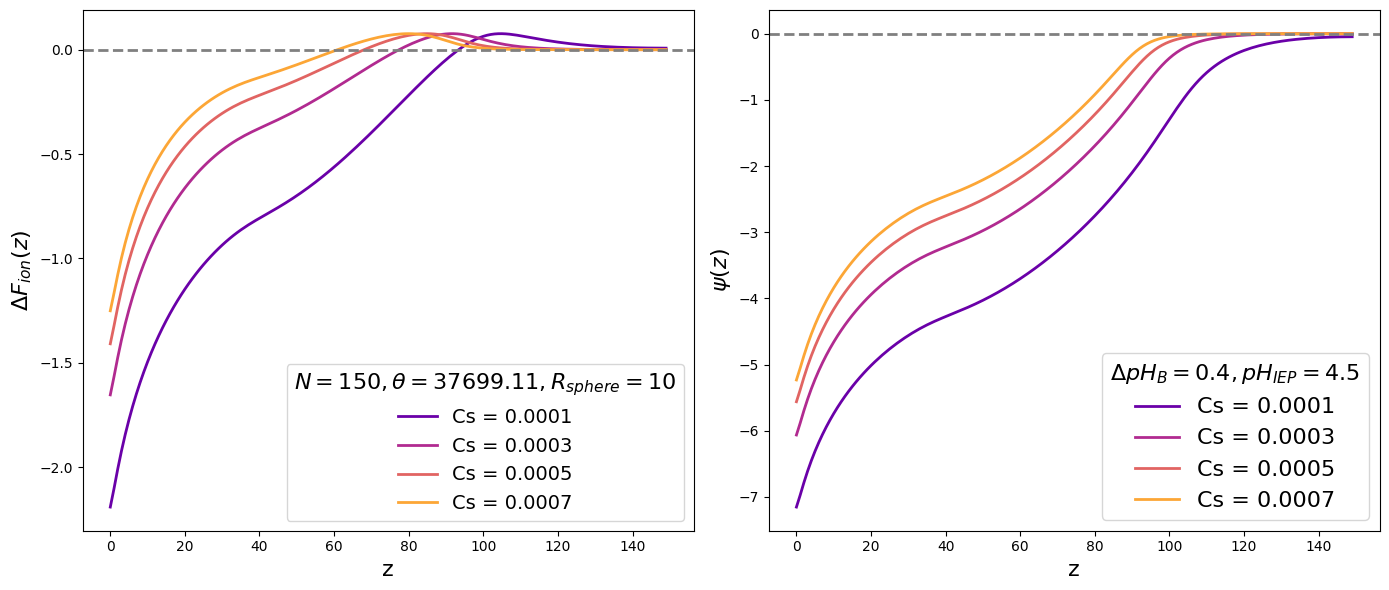

In [6]:
cmap = cm.plasma(np.linspace(0.2, 0.8, len(Cs_values)))

# Создаем два подграфика (side by side)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# График f_ion_SCF_quen
for i, Cs in enumerate(Cs_values):
    axs[0].plot(f_ion_SCF_quen_values[i], label=f'Cs = {round(Cs, 4)}', color=cmap[i], linewidth=2)
axs[0].axhline(y=0, color='gray', linestyle='--', linewidth=2)
axs[0].set_xlabel('z', fontsize=16)
axs[0].set_ylabel('$\Delta F_{{ion}}(z)$', fontsize=16)
axs[0].legend(title=f'$N = {N}, \\theta = {round(4 * np.pi * r_sphere**2 * N/S, 2)}, R_{{sphere}} = {r_sphere}$',
              loc='lower right',
              fontsize=14,
              title_fontsize = 16)

# График psi
for i, Cs in enumerate(Cs_values):
    axs[1].plot(potential[i], label=f'Cs = {round(Cs, 4)}', color=cmap[i], linewidth=2)
axs[1].axhline(y=0, color='gray', linestyle='--', linewidth=2)
axs[1].set_xlabel('z', fontsize=16)
axs[1].set_ylabel('$\psi(z)$', fontsize=16)
axs[1].legend(title=f'$\Delta pH_B = {round(d_pH_b, 1)}, pH_{{IEP}} = {round(pH_iep_in_quen, 1)}$',
              loc='lower right',
              fontsize=16,
              title_fontsize = 16)

# Показать графики
plt.tight_layout()
# plt.savefig('sphere_F_psi_cs.pdf', dpi=300, bbox_inches='tight')
plt.show()